# Computer vision - Laboratory

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

1)	Segmentation of video shots with static scenes.

2) Background substraction.

3)	Segmentation of images.

In order to successfuly complete this practicum it is necessary to understand the following theory concepts: background substraction, K-means clustering, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 3.1 Background substraction methods


Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, remove all the "artifacts" considered as foreground related to movement extracting the background images.

Note: One of the applications of these methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Read and visualize the sequence of images "images/Barcelona-sequence"
Hint: In order to read a  collection of images, we wil use the function animation.FuncAnimation [https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html].

Observe in the following example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

<IPython.core.display.Javascript object>


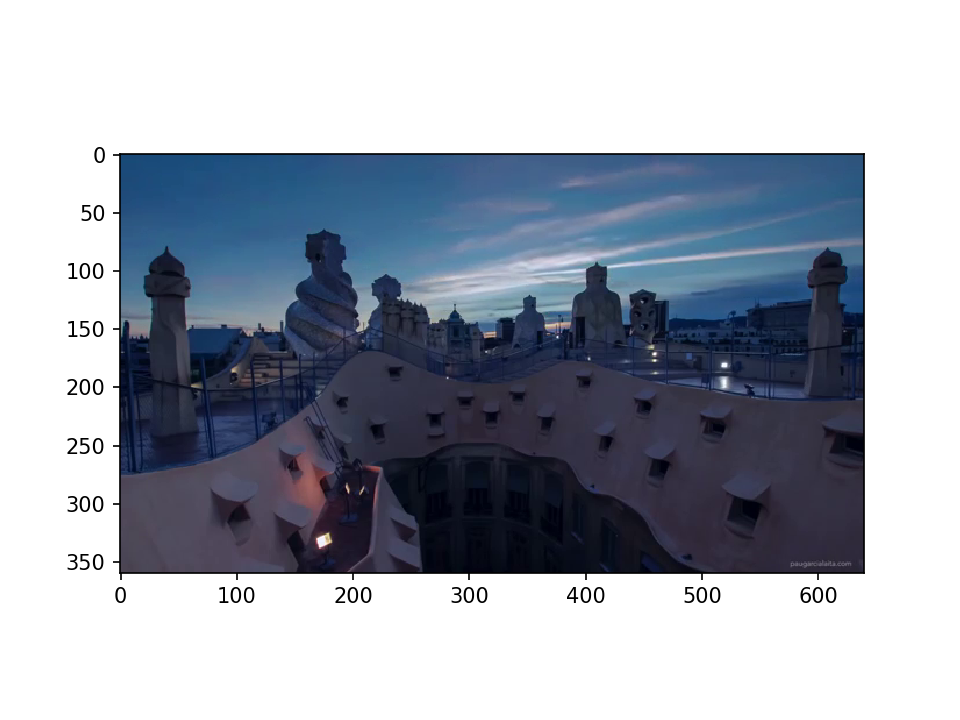

In [4]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=50, repeat= False)

a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. Which measure can be used in order to visually distinguish the shots in a plot? Explain your solution.

Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">

**Hint:** take the following example of video and temporal plot visualization as a template. The plot must be replaced by a frame by frame measure to be defined by you, being applicable to distinguish the shots.

- If you need to convert the image to float, the command is: img_as_float()
- If you need the histogram, it is in skimage.exposure

<IPython.core.display.Javascript object>


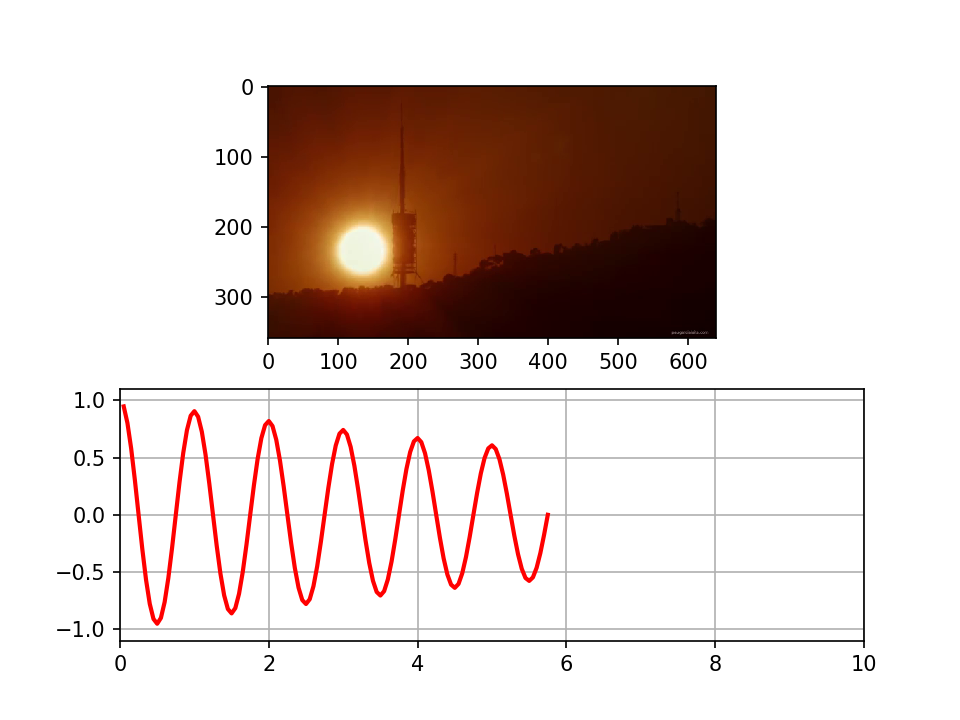

In [5]:
# Example
# Sinusoidal plot points generation
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

In [6]:
from skimage import img_as_float
from skimage import exposure

def histograma_(nbins_in, imatge):
    
    imatgeR = imatge.copy() #we create a copy
    imatgeG = imatge.copy() #we create a copy
    imatgeB = imatge.copy() #we create a copy
    
    imatgeR = img_as_float(imatgeR[:,:,0]) #we obtain the red channel
    imatgeG = img_as_float(imatgeG[:,:,1]) #we obtain the green channel
    imatgeB = img_as_float(imatgeB[:,:,2]) #we obtain the blue channel

    hist_r, bins_r = exposure.histogram(imatgeR, nbins = nbins_in) #we generate the histogram for the red channel
    hist_g, bins_g = exposure.histogram(imatgeG, nbins = nbins_in) #we generate the histogram for the green channel
    hist_b, bins_b = exposure.histogram(imatgeB, nbins = nbins_in) #we generate the histogram for the blue channel
    
    return (hist_r, hist_g, hist_b)


In [7]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt

#method to calculate the mean
def calcul_mitjana():
    ic = io.ImageCollection('images/Barcelona-sequence/*.png')

    red_a, blue_a, green_a = histograma_(8,ic[0]) #we calculate the histogram for the first photo in ic collection

    funcio = []

    for fotograma in ic[1:]:#for all photos in ic except the first
        red, green, blue = histograma_(8,fotograma) #we calculate the histogram

        redT = np.linalg.norm(red-red_a) #we substract the previous image to the actual one 
        greenT = np.linalg.norm(green-green_a)
        blueT = np.linalg.norm(blue-blue_a)

        mitjana = (redT+greenT+blueT)/3 #we  calculate the mean of the 3 channels

        funcio.append(mitjana)#and append this mean to the function we are creating
        
        #saving previous values
        red_a = red
        green_a = green
        blue_a = blue
    funcio[0] = 0
    return funcio



In [8]:
#ATENCIÓ! aquesta funció s'utilitza en els següents exercicis, cal executar-la.

def print_1x2(imatge,imatge_despres):
    fig, axarr = plt.subplots(1,2)
    fig.set_size_inches(25,10)
    
    #imatge
    axarr[0].imshow(imatge,cmap='gray')
    axarr[0].set_title('Inici de seqüència')
    axarr[0].xaxis.set_visible(False)
    axarr[0].yaxis.set_visible(False)
    
    #imatge després
    axarr[1].imshow(imatge_despres, cmap='gray')
    axarr[1].set_title('Final de seqüència')
    axarr[1].xaxis.set_visible(False)
    axarr[1].yaxis.set_visible(False)
    plt.show()

    
def print_1x1(imatge,title):
    fig, axarr = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    
    #imatge
    axarr.imshow(imatge,cmap='gray')
    axarr.set_title(title)
    axarr.xaxis.set_visible(False)
    axarr.yaxis.set_visible(False)

    plt.show()

def print_1x3(imatge,imatge1, imatge2, title, title1, title2):
    fig, axarr = plt.subplots(1,3)
    fig.set_size_inches(20,10)
    
    #imatge
    axarr[0].imshow(imatge,cmap='gray')
    axarr[0].set_title(title)
    axarr[0].xaxis.set_visible(False)
    axarr[0].yaxis.set_visible(False)
    
    axarr[1].imshow(imatge1, cmap='gray')
    axarr[1].set_title(title1)
    axarr[1].xaxis.set_visible(False)
    axarr[1].yaxis.set_visible(False)
    
    axarr[2].imshow(imatge2, cmap='gray')
    axarr[2].set_title(title2)
    axarr[2].xaxis.set_visible(False)
    axarr[2].yaxis.set_visible(False)
    plt.show()

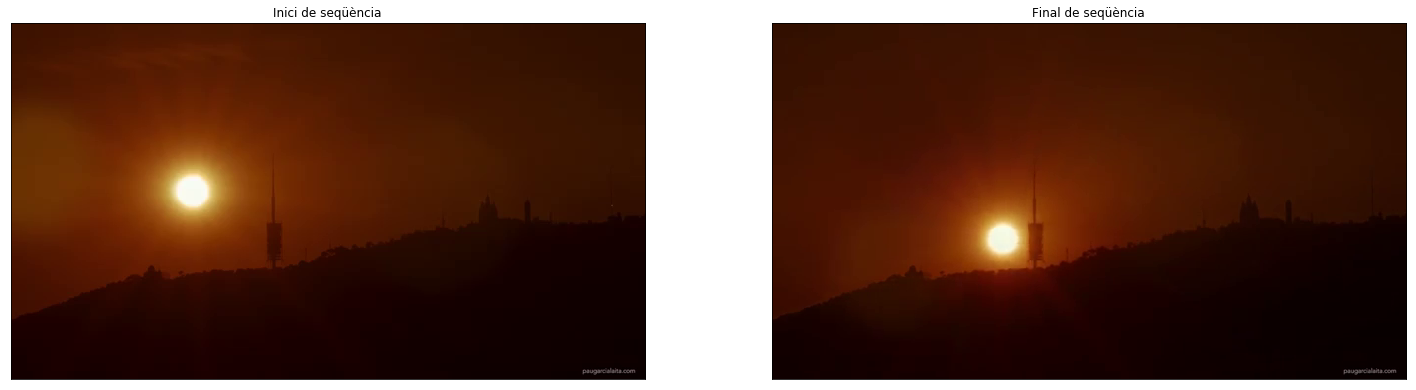

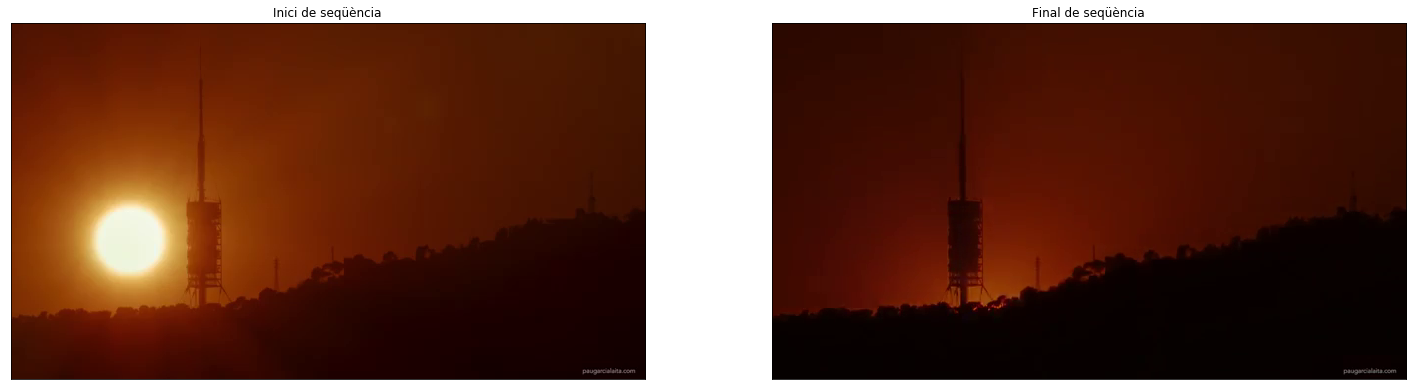

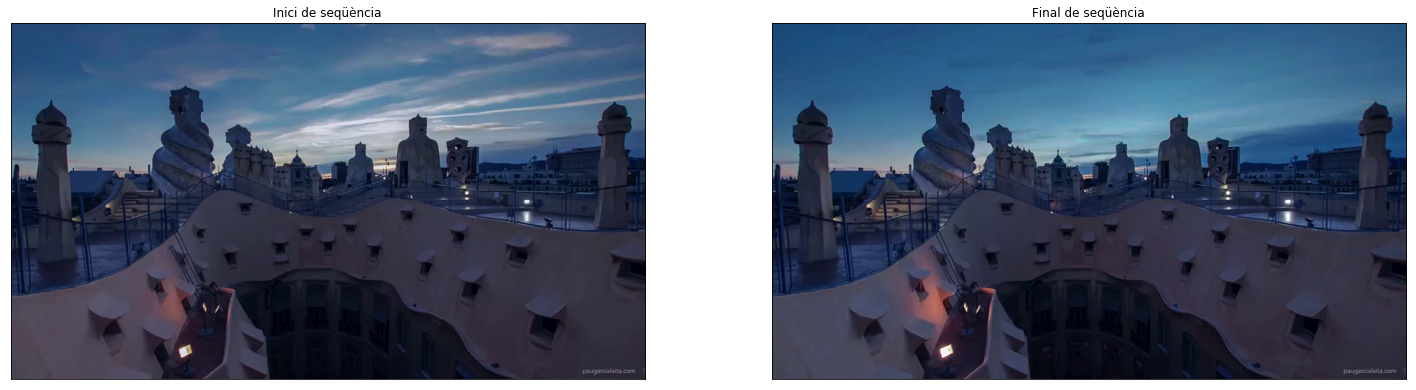

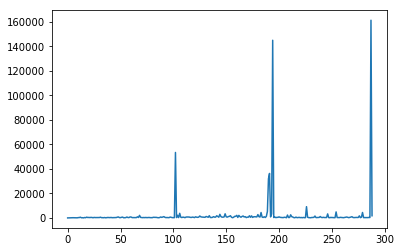

In [9]:
%matplotlib inline

llista_valors = calcul_mitjana()
ic = io.ImageCollection('images/Barcelona-sequence/*.png')
contador = 0
inici = 0
indicies_of_shots = []
for i in llista_valors:
    #if there's a peak in the fucntion higher than 50000 we determine the start and the end of a shot
    if i>50000:
        print_1x2(ic[inici],ic[contador])
        indicies_of_shots.append((inici,contador))
        inici = contador + 1
    contador += 1
plt.plot(llista_valors, "")
plt.show()

---
We first calculate the norm between an image(for each channel), and its previous image in the image collection. We can represent all this values as a function, in a plot, calculating the mean of each channel norm. In this function(shown above) we can see that there are 3 peaks, which represent the change between different shots, as the norm values will have a greater difference. Using the values of this peaks as reference, and applying a treshold, we can obtain the different shots separately.
___

## 3.2 Background substraction

Apply the background substraction algorithm (check theory material).

Visualize, for each shot of the video:
    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [10]:
def find_background(ic, start, end):
    imatge_negre = np.zeros([ic[0].shape[0],ic[0].shape[1], 3],np.uint8) #we create a black image that we'll fill later

    shot_images = ic[start:end]#separate the images from the shot

    red_channels_list = [] #lists for each channel from each image of the shot
    green_channels_list = []
    blue_channels_list = []
    
    #for each picture in the shot
    for i in shot_images:
        #we separate each color channel
        red_channels_list.append(img_as_float(i[:,:,0]))
        green_channels_list.append(img_as_float(i[:,:,1]))
        blue_channels_list.append(img_as_float(i[:,:,2]))
    
    #we calculate the median for every channel, using every image in shot_images
    red_channels_median = np.median(red_channels_list, axis = 0)       
    green_channels_median = np.median(green_channels_list, axis = 0)       
    blue_channels_median = np.median(blue_channels_list, axis = 0)       
    
    #we set the image_negre colors using each color channel generated with the median
    for i in range(imatge_negre.shape[0]):
        for j in range(imatge_negre.shape[1]):
            imatge_negre[i,j] = [red_channels_median[i,j]*255,green_channels_median[i,j]*255,blue_channels_median[i,j]*255]

    return (imatge_negre)

In [11]:
from skimage import img_as_float
def find_background_substract(ic, start, end, image):
    imatge_negre = np.zeros([ic[0].shape[0],ic[0].shape[1], 3],np.uint8)#we create a black image that we'll fill later

    shot_images = ic[start:end]#separate the images from the shot


    red_channels_list = []#lists for each channel from each image of the shot
    green_channels_list = []
    blue_channels_list = []
    #for each picture in the shot
    for i in shot_images:
        #we separate each color channel
        red_channels_list.append(img_as_float(i[:,:,0]))
        green_channels_list.append(img_as_float(i[:,:,1]))
        blue_channels_list.append(img_as_float(i[:,:,2]))
    #we calculate the median for every channel, using every image in shot_images
    red_channels_median = np.median(red_channels_list, axis = 0)       
    green_channels_median = np.median(green_channels_list, axis = 0)       
    blue_channels_median = np.median(blue_channels_list, axis = 0)       
    #we set the image_negre colors using each color channel generated with the median
    for i in range(imatge_negre.shape[0]):
        for j in range(imatge_negre.shape[1]):
            imatge_negre[i,j] = [red_channels_median[i,j]*255,green_channels_median[i,j]*255,blue_channels_median[i,j]*255]
    image = image-imatge_negre #we substract the resulting image to the one we want
    print_1x1(image,'Substracted image')

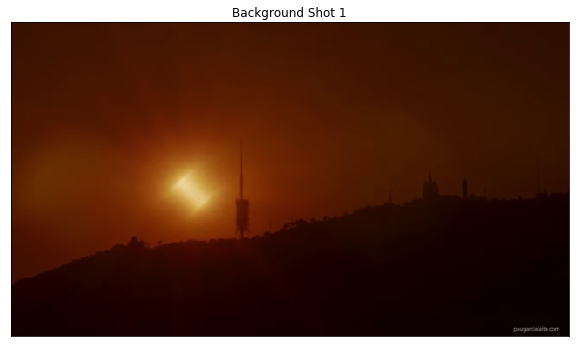

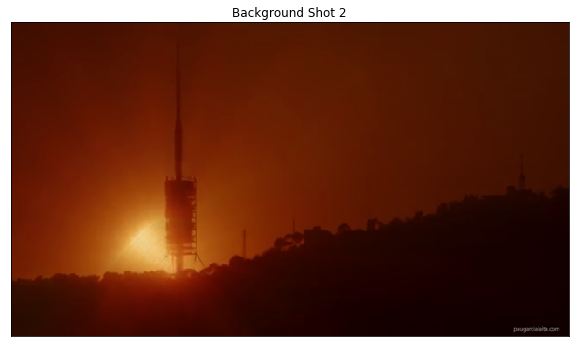

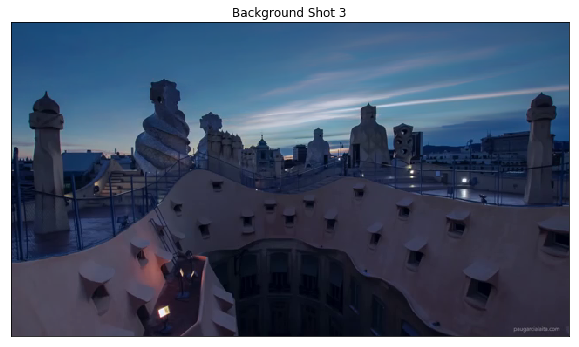

In [12]:
%matplotlib inline
print_1x1(find_background(ic, indicies_of_shots[0][0],indicies_of_shots[0][1]), "Background Shot 1")
print_1x1(find_background(ic, indicies_of_shots[1][0],indicies_of_shots[1][1]), "Background Shot 2")
print_1x1(find_background(ic, indicies_of_shots[2][0],indicies_of_shots[2][1]), "Background Shot 3")

---
For each shot, we are not showing the original images as they are shown in the explanation on the first exercise. We can see down here, the shots images with the background substracted to them. 

<IPython.core.display.Javascript object>


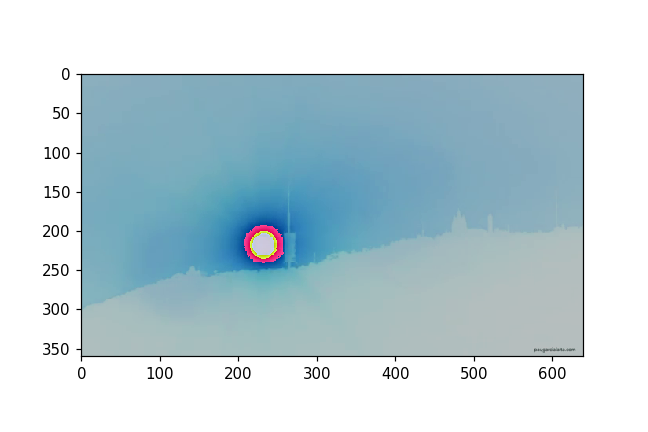

In [39]:
from skimage.filters import threshold_mean
start = indicies_of_shots[0][0] #start and end of the shot
end = indicies_of_shots[0][1]

background = find_background(ic, indicies_of_shots[0][0],indicies_of_shots[0][1])#we find the background of the shot

llista_imatges = []

thresh = threshold_mean(background)#we apply a threshold to the background
for i in ic[start:end]:    #for each image in the shot
    im_foreground = (i - thresh)#we substract the thresholded background to each image
    llista_imatges.append(im_foreground)#we append the resulting image in a list

        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(llista_imatges[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(llista_imatges[i])
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames= end-start, repeat= False)

<IPython.core.display.Javascript object>


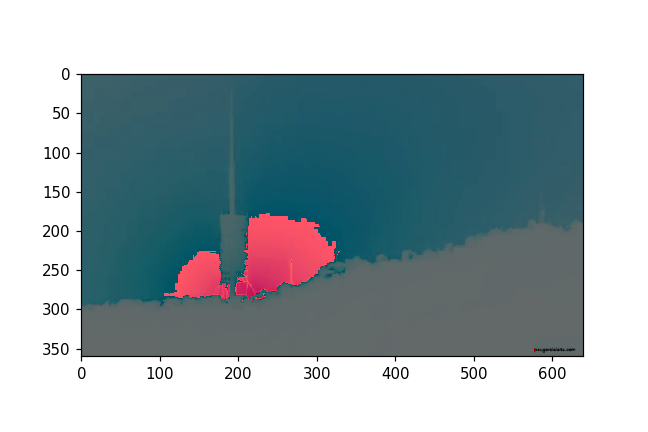

In [40]:
start = indicies_of_shots[1][0]
end = indicies_of_shots[1][1]

background = find_background(ic, indicies_of_shots[1][0],indicies_of_shots[1][1])

llista_imatges = []
thresh = threshold_mean(background)#we apply a threshold to the background
for i in ic[start:end]:    #for each image in the shot
    im_foreground = (i - thresh)#we substract the thresholded background to each image
    llista_imatges.append(im_foreground)#we append the resulting image in a list

        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(llista_imatges[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(llista_imatges[i])
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames= end-start, repeat= False)

<IPython.core.display.Javascript object>


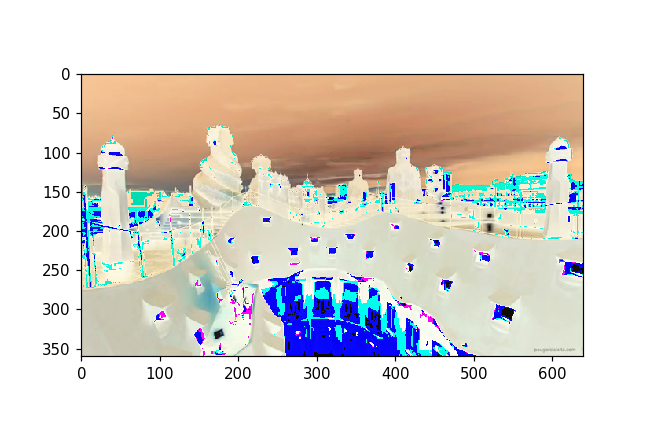

In [41]:
start = indicies_of_shots[2][0]
end = indicies_of_shots[2][1]

background = find_background(ic, indicies_of_shots[2][0],indicies_of_shots[2][1])

llista_imatges = []

thresh = threshold_mean(background)#we apply a threshold to the background
for i in ic[start:end]:    #for each image in the shot
    im_foreground = (i - thresh)#we substract the thresholded background to each image
    llista_imatges.append(im_foreground)#we append the resulting image in a list

        # Reading a sequence of images from a folder

import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(llista_imatges[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(llista_imatges[i])
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames= end-start, repeat= False)

Comment your implementation including details. What happens if the shots are not correctly extracted? What happens if you find too many shots in the video? What do the static background images represent? In which situations does the algorithm work and in which it does not? What happens if you substract the background image from the original one?

Do you see any additional application for this algorithm?

**[OPTIONAL]**
Apply the algorithm to some other static video that you found.

---
First, we look for the background. To find it, we separate the three color channels of each image of the shot, and we save it in an array. Then, we calculate the median between every pixel from each image, to obtain one image for each channel. After this, we combine the 3 color layers in a single image, that will represent the background.
The foreground we've obtained is not exact. We could filter the images more so everything that's in the background is set as white, but with our result we can recognise how's the foreground. As an example, we can see the sun moving in the first shot.

If the shots are not correctly extracted, the median values may change, but not a lot, it depends on how badly the shots are extracted.

As we've implemented this separating the shots, it doesnt matter how many shots there are in the video, as long as you dont process a lot of information at the same time(the pc memory would "blow up").

Static background images represent everything that's not changing in the sequence of images.

This algorithm works whenever there's "movement" between the different images from the shot, and also, as long as the shot is taken from an static point of view, if there are slight changes on the position where the shot is taken, this will not work at all. 

If we substract the background from the original image, we obtain the foreground.

We could use this algorithm to find corrupted images in a video, as we look for the foreground, each frame of the sequence should get a similar result, if a frame is different, we could consider it a "bad" frame.

___

## 3.3 Clustering methods on the RGB-XY space

a) Read any image from the folder 'images' and segment it using Felzenszwalbs's method. Test different parameters in order to obtain a good image segmentation. How does each parameter behave? Which are the optimal values? Comment what algorithm is the method based in up to 3 lines most.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)
- Add title to the figures to explain what is displayed.

In [19]:
%matplotlib inline
from skimage.segmentation import felzenszwalb

loro = io.imread('images/loro.png')
segmentation_image = loro.copy()
segmentation_image1 = loro.copy()
segmentation_image2 = loro.copy()

segmentation_image = felzenszwalb(segmentation_image, scale = 100, sigma = 2, min_size = 50)
segmentation_image1 = felzenszwalb(segmentation_image1, scale = 50, sigma = 1, min_size = 25)
segmentation_image2 = felzenszwalb(segmentation_image2, scale = 150, sigma = 3, min_size = 75)


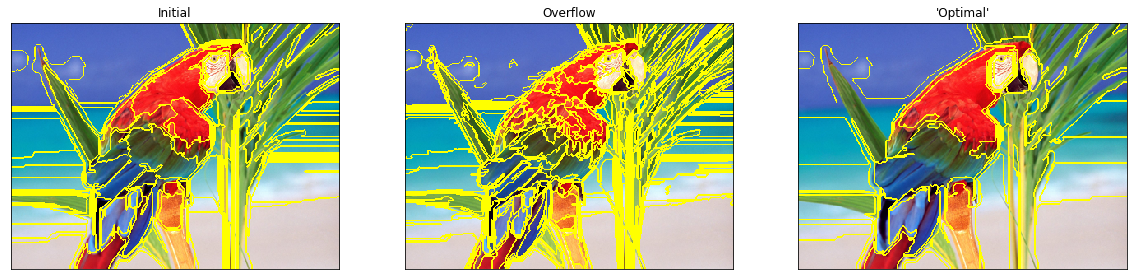

In [24]:
print_1x3(skimage.segmentation.mark_boundaries(loro, segmentation_image),
         skimage.segmentation.mark_boundaries(loro, segmentation_image1),
         skimage.segmentation.mark_boundaries(loro, segmentation_image2),
         "Initial", "Overflow", "'Optimal'")

---
**scale:** modifying this value, we can control the number of produced segments and their size. As higher this value is, the clusters will be larger.

**sigma:** modifying this value, we can change the width of the Gaussian kernel. As higher this value is, the clusters will be larger, as the image will be smoother.

**min_size:** this value changes the minimum component size. Modifiying this will make clusters larger as we increase this value.

___

We consider that the optimal values are the ones at the third image, but this is our opinion. The 'Optimal' clusters represent each part of the colors from the bird. So we are focusing on the segmentation of the image looking for the different colors of the image.
___
The Felzenszwalb algorithm is a graph based segmentation algorithm. It measures the evidence for a boundary between two regions. It uses greedy solutions, but still the result is good enough to segmentate an image.
___

b) Segment the previous image using SLIC algorithm. Test different parameters in order to obtain a good image segmentation. How does each parameter behave? Upt o your opinion, which are the optimal values? Comment what algorithm is the method based in up to 3 lines.

In [21]:
%matplotlib inline
from skimage.segmentation import slic

loro = io.imread('images/loro.png')
segmentation_slic = loro.copy()
segmentation_slic1 = loro.copy()
segmentation_slic2 = loro.copy()

segmentation_slic = slic(segmentation_slic, n_segments=100, compactness=10.0, sigma=0)
segmentation_slic1 = slic(segmentation_slic1, n_segments=200, compactness=5.0, sigma=5)
segmentation_slic2 = slic(segmentation_slic2, n_segments=50, compactness=10.0, sigma=2.5)


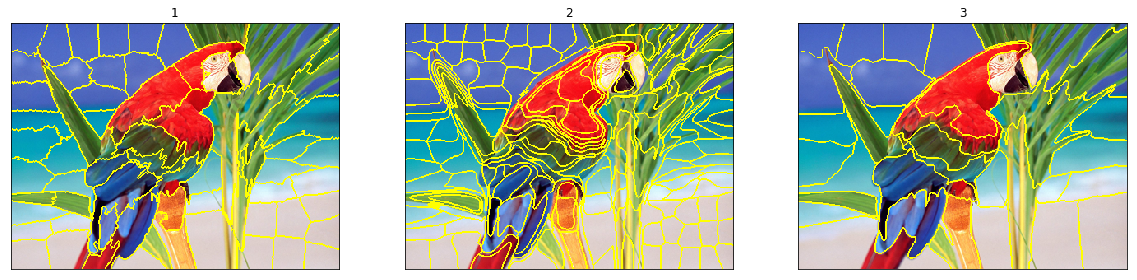

In [22]:
print_1x3(skimage.segmentation.mark_boundaries(loro, segmentation_slic),
         skimage.segmentation.mark_boundaries(loro, segmentation_slic1),
         skimage.segmentation.mark_boundaries(loro, segmentation_slic2),
         "1", "2", "3")

---
**n_segments:** modifying this value the result will have more or less segments. The value is the actual number of segments.

**sigma:** modifying this value, we can change the width of the Gaussian kernel. As higher this value is, the clusters will be larger, as the image will be smoother.

**compactness:** this value balances color proximity and space proximity. Higher values give more weight to space proximity.

___

As we did with the felzenszwalb exercice, consider that the optimal values are the ones at the third image, but this is our opinion. The 'Optimal' clusters represent each part of the colors from the bird.
___
SLIC algorithm, is based on k-means clustering in Color-(x,y,z) space. This technique is also known as superpixels, as the result of this algorithm is like the representation of a pixel for each segment.
___

c) Plot the original image and the results of both algorithms in a 1x3 subplot. Calculate also the number of segments obtained on the image by each of the algorithms. Comment the differences between each method as well as their advantages and disadvantages.

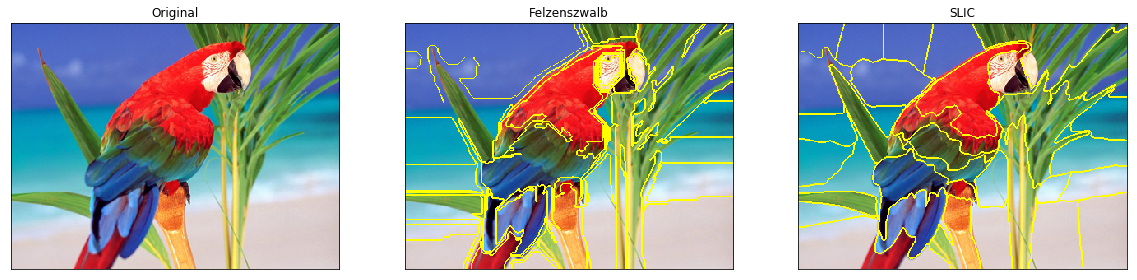

In [23]:
print_1x3(loro,
         skimage.segmentation.mark_boundaries(loro, segmentation_image2),
         skimage.segmentation.mark_boundaries(loro, segmentation_slic2),
         "Original", "Felzenszwalb", "SLIC")

---
The number of segments obtained in the SLIC image is equal as the n_segments we use, in this case its value is 50.
For the Felzenszwalb image, we dont know how to calculate the number of segments.
We can see that the result between the two images is a bit different. The Felzenszwalb image follows more the contours of the images, and the slic image separates the image into diferent "superpixels", following the contours. 
The felzenszwalb is better separating the image with the contours of an element in the image, for example, separating the parrot from the sea.
The SLIC is better separating the image colors, without separating the image elements.
___